In [1]:
import splat
import wisps
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data='/Users/caganze/research/wisps/data/manjavacas/final_data_journal/*.csv'

In [3]:
spectra=[]
for f in glob.glob(data):
    d=ascii.read(f).to_pandas()
    s=wisps.Spectrum(wave=d.col1, flux=d.col2, noise=d.col3)
    s._filename=f.split('/')[-1].split('.csv')[0]
    spectra.append(s)

In [4]:
indices=pd.DataFrame([s.indices for s in spectra])
snr1=[s.snr['snr1'] for s in spectra]
snr2=[s.snr['snr2'] for s in spectra]
ftests=pd.DataFrame.from_records([{'spex_chi': s.spex_chi, 'line_chi':s.line_chi, 'spt':s.spt, 'f_test':s.f_test} for s in spectra])

In [5]:
df=pd.DataFrame()
for k in indices.columns: df[k]=indices[k]
for k in ftests.columns: df[k]=ftests[k]
df['snr1']=snr1
df['snr2']=snr2
df['name']=[s.filename for s in spectra]
df['spectra']=spectra

In [6]:
#wisps.datasets['spex']

In [7]:
df.to_pickle(wisps.LIBRARIES+'/manjavacas.pkl')

No handles with labels found to put in legend.


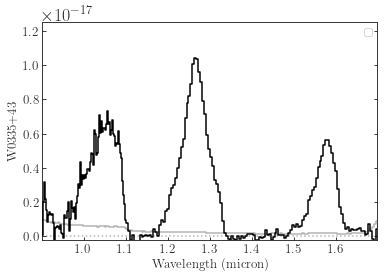

No handles with labels found to put in legend.


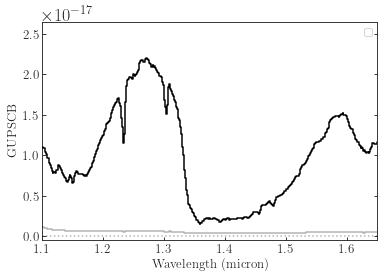

No handles with labels found to put in legend.


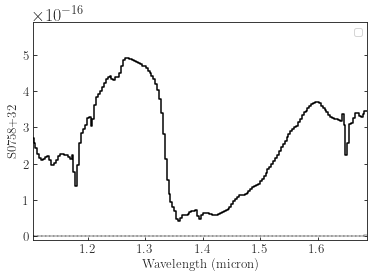

No handles with labels found to put in legend.


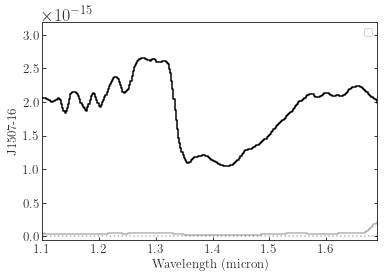

No handles with labels found to put in legend.


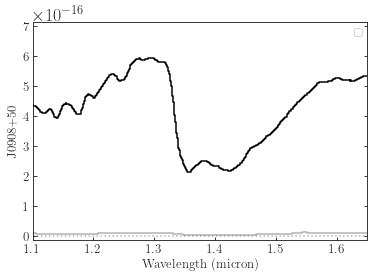

No handles with labels found to put in legend.


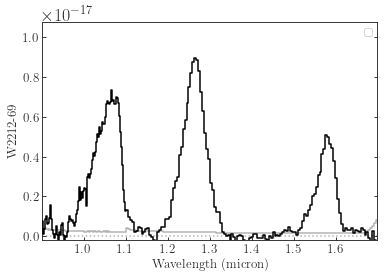

No handles with labels found to put in legend.


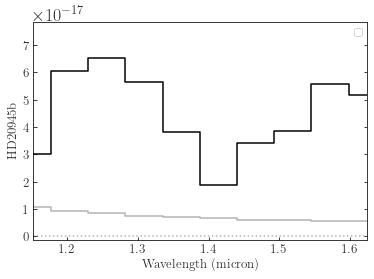

No handles with labels found to put in legend.


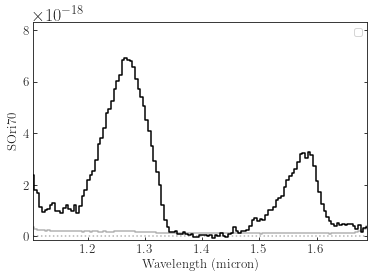

No handles with labels found to put in legend.


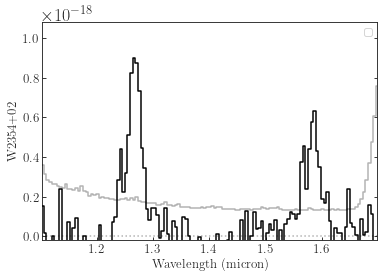

No handles with labels found to put in legend.


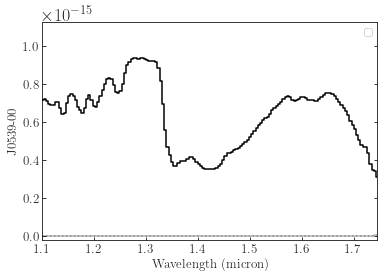

No handles with labels found to put in legend.


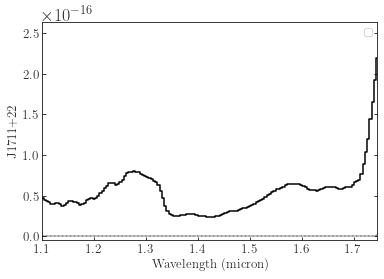

No handles with labels found to put in legend.


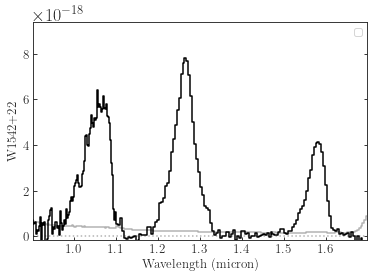

No handles with labels found to put in legend.


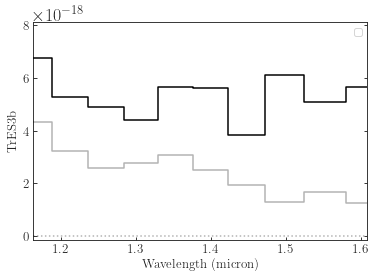

No handles with labels found to put in legend.


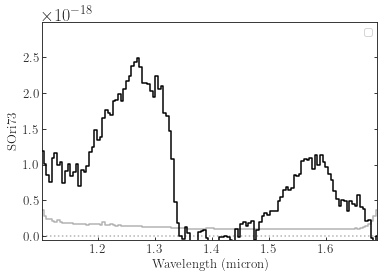

No handles with labels found to put in legend.


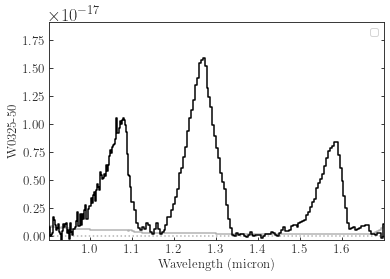

No handles with labels found to put in legend.


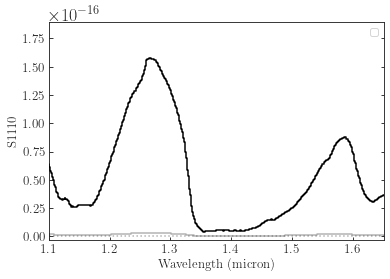

No handles with labels found to put in legend.


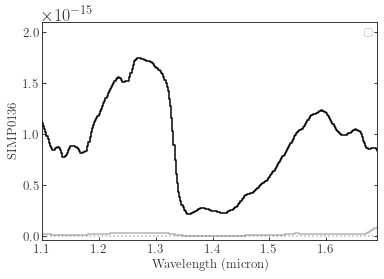

No handles with labels found to put in legend.


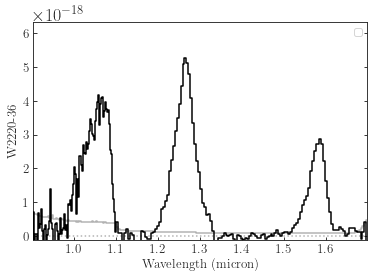

No handles with labels found to put in legend.


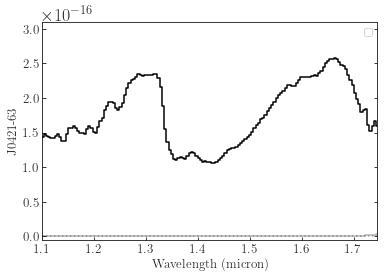

No handles with labels found to put in legend.


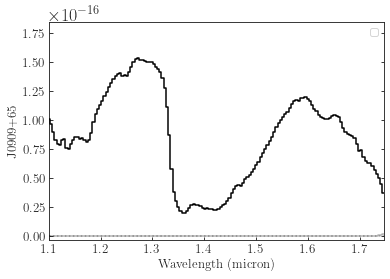

No handles with labels found to put in legend.


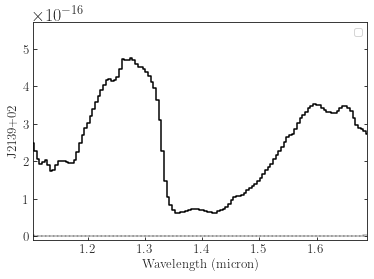

No handles with labels found to put in legend.


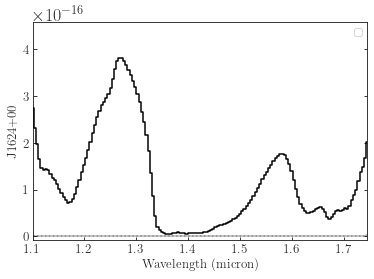

No handles with labels found to put in legend.


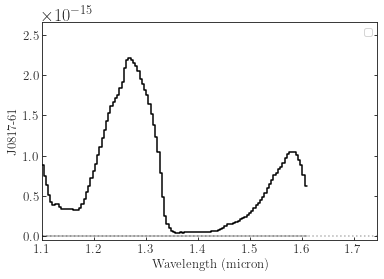

No handles with labels found to put in legend.


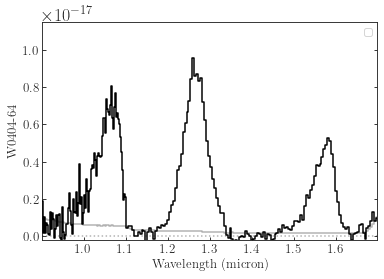

No handles with labels found to put in legend.


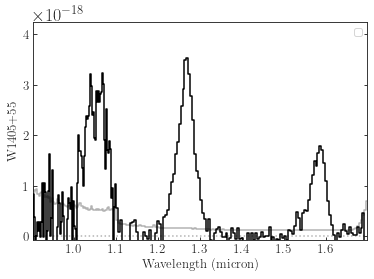

No handles with labels found to put in legend.


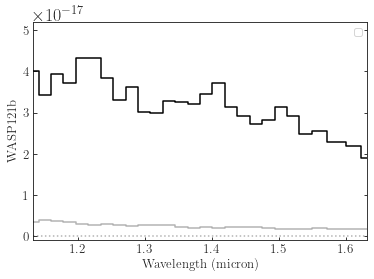

No handles with labels found to put in legend.


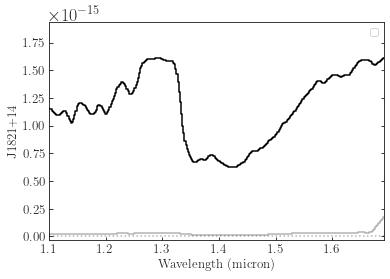

No handles with labels found to put in legend.


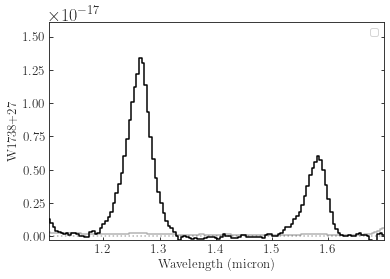

No handles with labels found to put in legend.


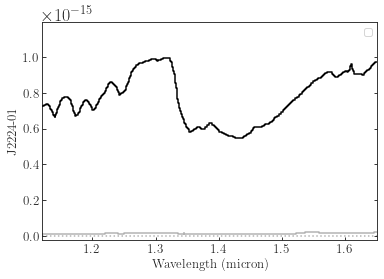

No handles with labels found to put in legend.


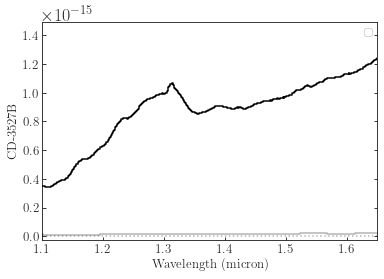

No handles with labels found to put in legend.


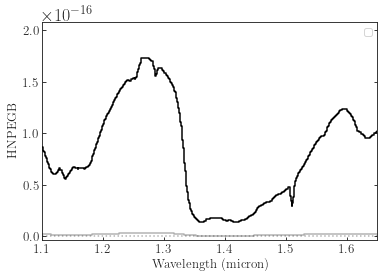

No handles with labels found to put in legend.


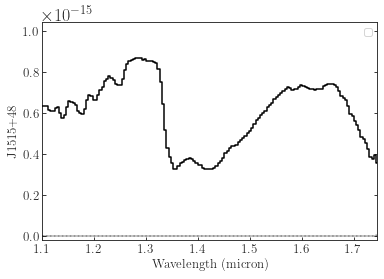

No handles with labels found to put in legend.


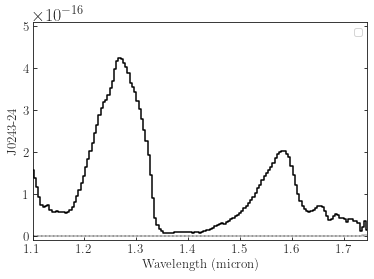

No handles with labels found to put in legend.


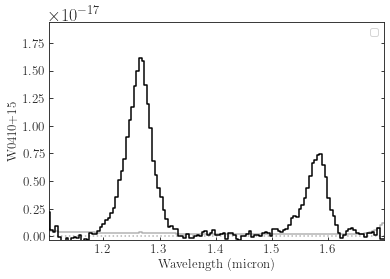

No handles with labels found to put in legend.


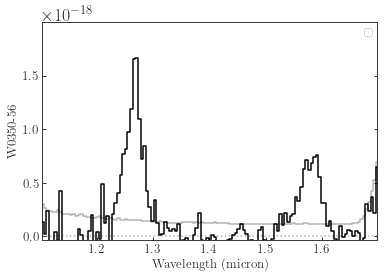

No handles with labels found to put in legend.


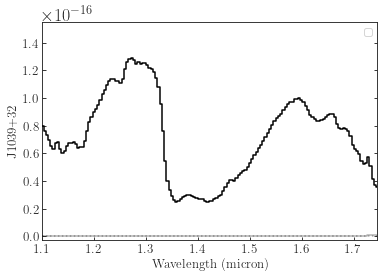

No handles with labels found to put in legend.


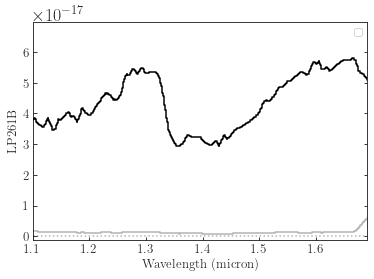

No handles with labels found to put in legend.


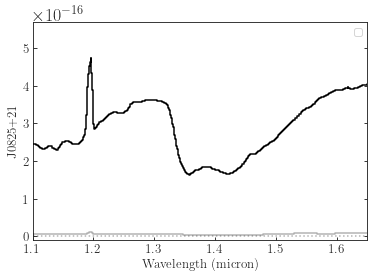

No handles with labels found to put in legend.


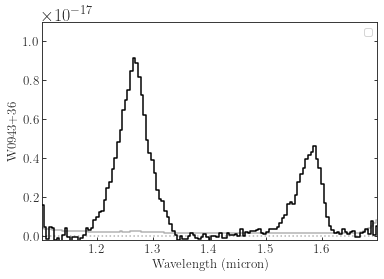

No handles with labels found to put in legend.


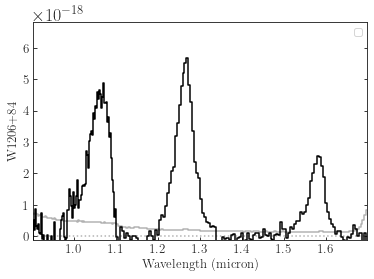

No handles with labels found to put in legend.


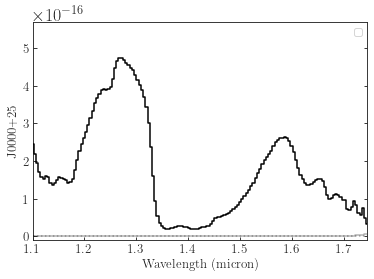

No handles with labels found to put in legend.


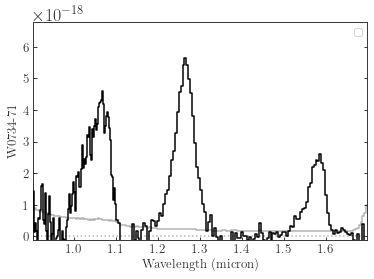

No handles with labels found to put in legend.


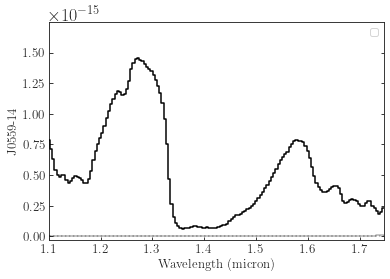

No handles with labels found to put in legend.


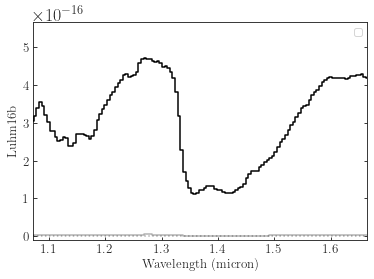

No handles with labels found to put in legend.


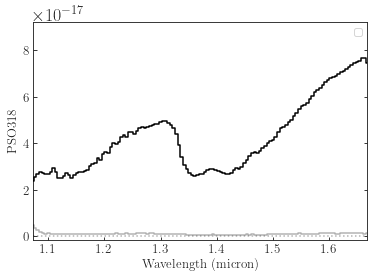

No handles with labels found to put in legend.


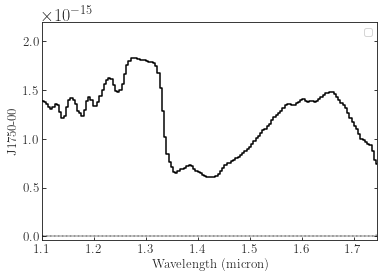

No handles with labels found to put in legend.


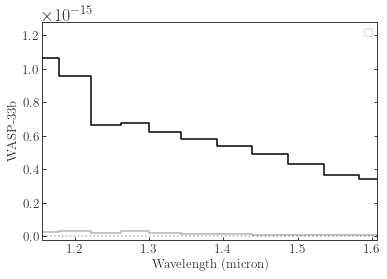

No handles with labels found to put in legend.


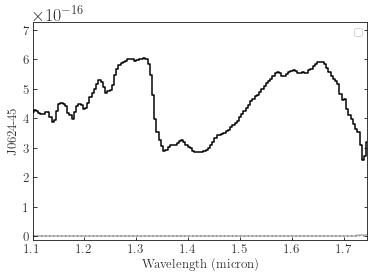

No handles with labels found to put in legend.


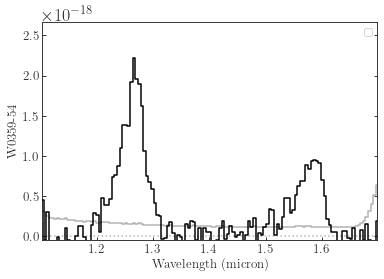

No handles with labels found to put in legend.


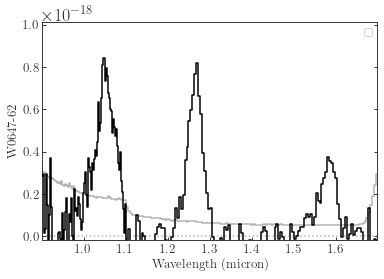

No handles with labels found to put in legend.


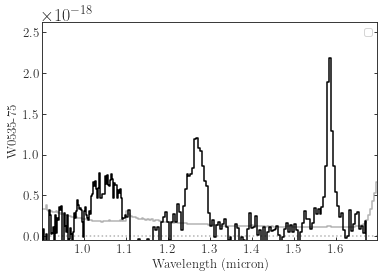

No handles with labels found to put in legend.


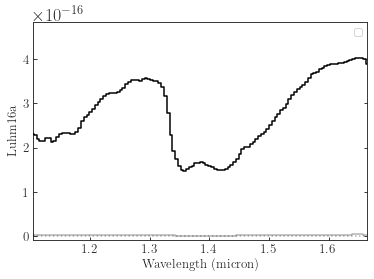

No handles with labels found to put in legend.


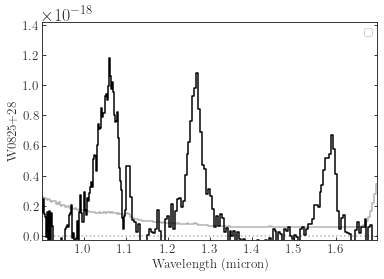

No handles with labels found to put in legend.


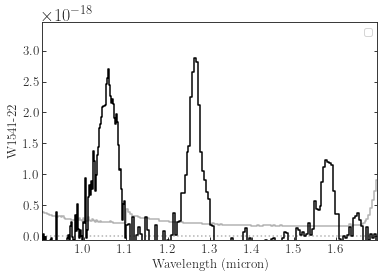

No handles with labels found to put in legend.


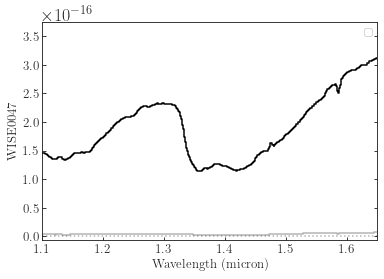

No handles with labels found to put in legend.


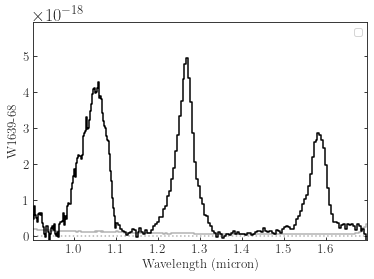

No handles with labels found to put in legend.


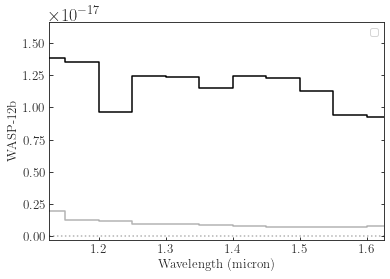

No handles with labels found to put in legend.


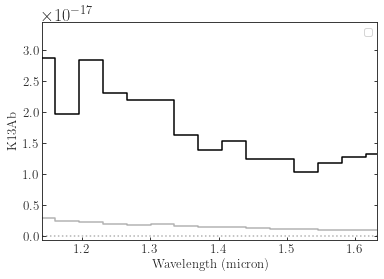

No handles with labels found to put in legend.


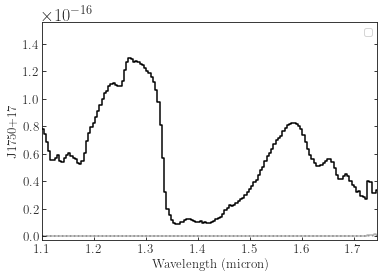

No handles with labels found to put in legend.


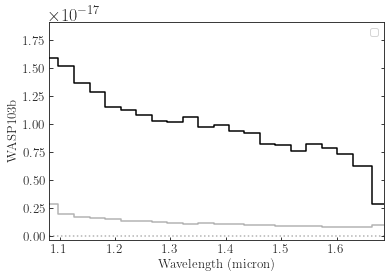

No handles with labels found to put in legend.


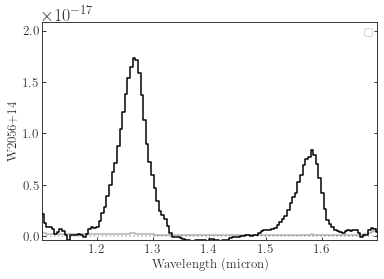

No handles with labels found to put in legend.


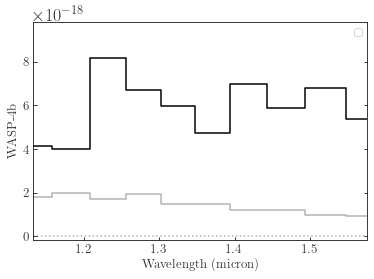

No handles with labels found to put in legend.


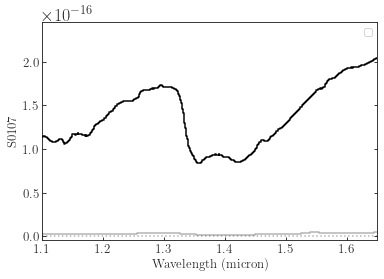

No handles with labels found to put in legend.


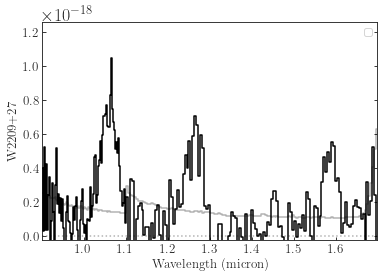

No handles with labels found to put in legend.


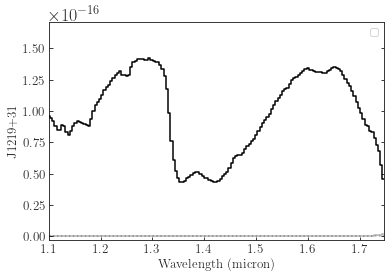

No handles with labels found to put in legend.


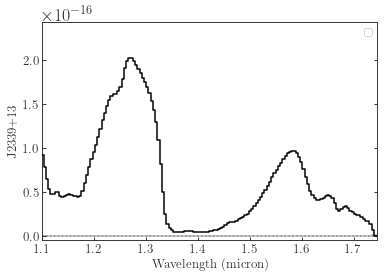

No handles with labels found to put in legend.


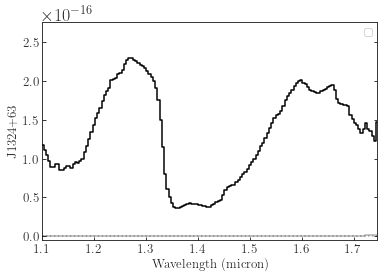

No handles with labels found to put in legend.


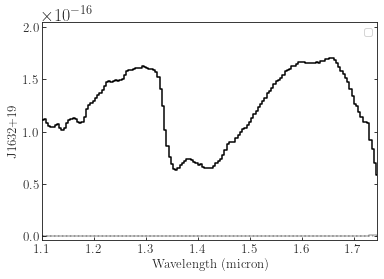

No handles with labels found to put in legend.


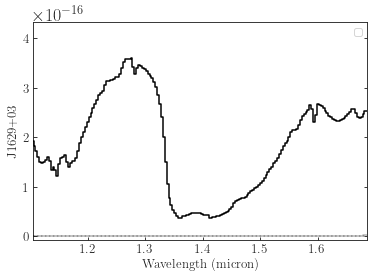

No handles with labels found to put in legend.


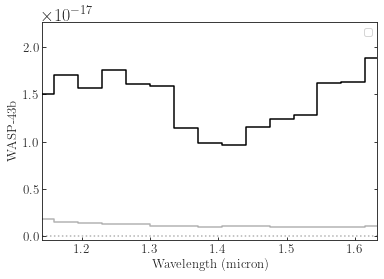

No handles with labels found to put in legend.


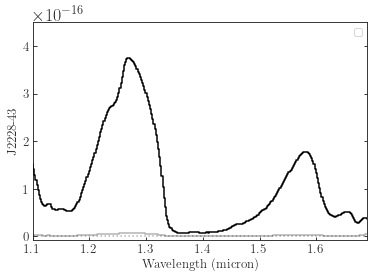

No handles with labels found to put in legend.


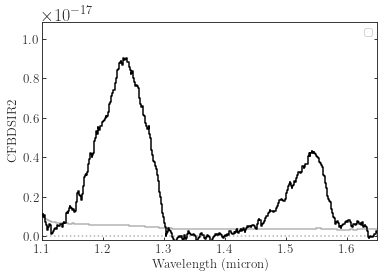

No handles with labels found to put in legend.


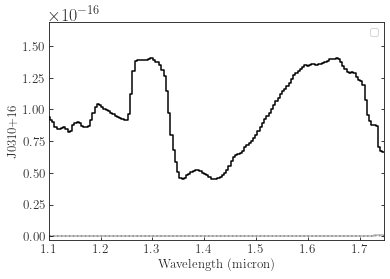

No handles with labels found to put in legend.


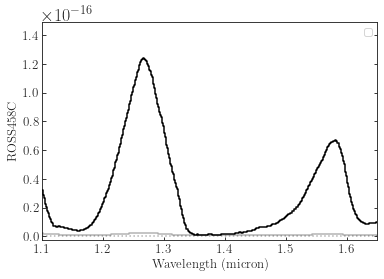

No handles with labels found to put in legend.


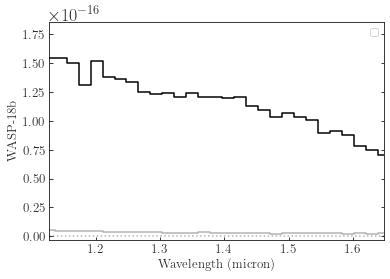

No handles with labels found to put in legend.


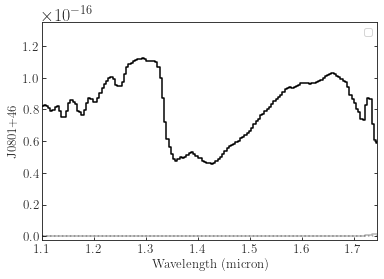

No handles with labels found to put in legend.


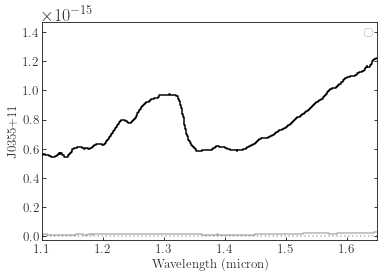

In [8]:
for s in spectra:
    s.splat_spectrum.plot(ylabel=s.filename)

In [9]:
#ghjkla
#spex=wisps.spex_sample_ids(stype='spex_sample',  from_file=False)
#spexids=pd.DataFrame([x for x in spex['Indices']])
#for k in spexids.columns: spex[k]=spexids[k]
#ref=wisps.Annotator.reformat_table(spexids)
df['spectra']=spectra
df=wisps.Annotator.reformat_table(df)

No handles with labels found to put in legend.


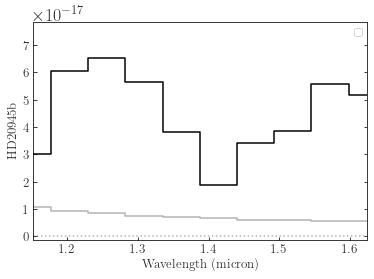

No handles with labels found to put in legend.


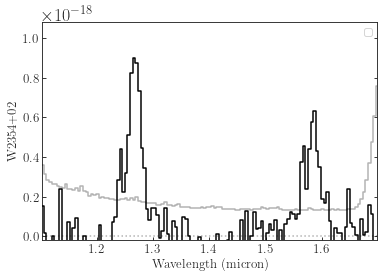

No handles with labels found to put in legend.


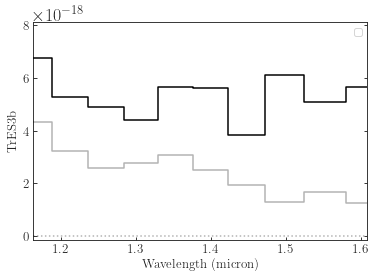

No handles with labels found to put in legend.


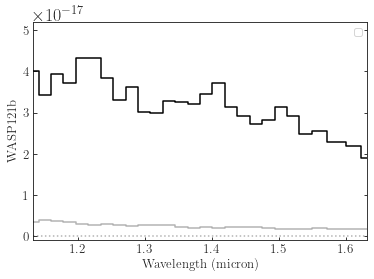

No handles with labels found to put in legend.


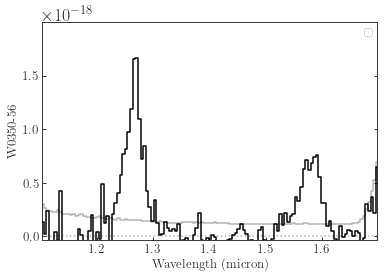

No handles with labels found to put in legend.


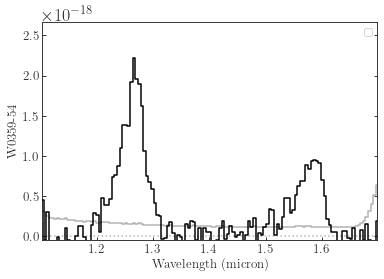

No handles with labels found to put in legend.


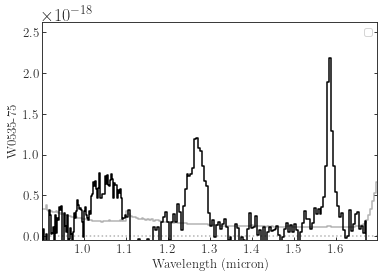

No handles with labels found to put in legend.


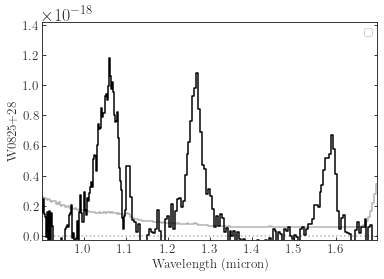

No handles with labels found to put in legend.


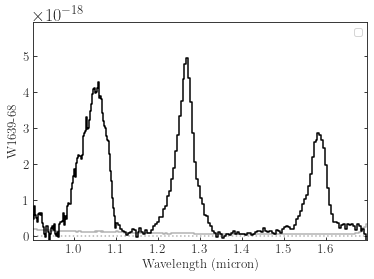

No handles with labels found to put in legend.


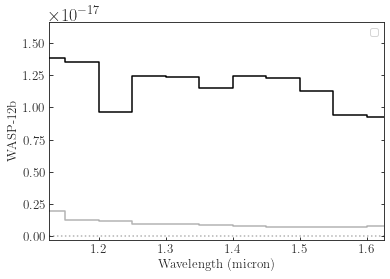

No handles with labels found to put in legend.


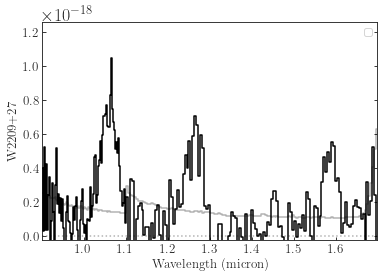

No handles with labels found to put in legend.


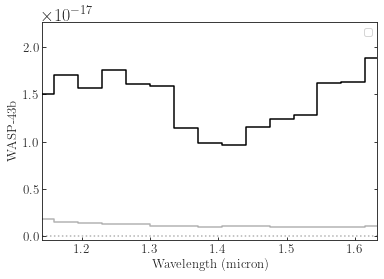

In [10]:
f=df[(df['CH_4/H-Cont'] <0.5) & (df['H-cont/J-Cont'] >0.6)].spectra.apply(lambda x: x.splat_spectrum.plot(ylabel=x.filename))

In [11]:
ydwarfs=df[df['spt'].apply(lambda x: splat.typeToNum(x))>37]
#df[(df['CH_4/H-Cont'] <0.5) & (df['H-cont/J-Cont'] >0.6)]

In [12]:
schn='/Users/caganze/research/wisps/data/schneider/*.txt'

In [13]:
spectra_schn=[]
for f in glob.glob(schn):
    d=ascii.read(f).to_pandas()
    s=wisps.Spectrum(wave=d.col1, flux=d.col2, noise=d.col3)
    s._filename=f.split('/')[-1].split('.csv')[0]
    spectra_schn.append(s)

In [14]:
wisps.datasets['manjavacas'].columns

Index(['H_2O-1/J-Cont', 'H_2O-2/H_2O-1', 'H-cont/H_2O-1', 'CH_4/H_2O-1',
       'H_2O-2/J-Cont', 'H-cont/J-Cont', 'CH_4/J-Cont', 'H-cont/H_2O-2',
       'CH_4/H_2O-2', 'CH_4/H-Cont', 'spex_chi', 'line_chi', 'spt', 'f_test',
       'snr1', 'snr2', 'name', 'spectra'],
      dtype='object')

In [15]:
indices=pd.DataFrame([s.indices for s in spectra_schn])
snrs=pd.DataFrame([s.snr for s in spectra_schn])
fs=pd.DataFrame.from_records([{'spex_chi': s.spex_chi,
                               'line_chi':s.line_chi, 'spt':s.spt, 'f_test':s.f_test} for s in spectra_schn])

In [16]:
df=pd.DataFrame()
df['name']=[s.filename.replace('.txt', '') for s in spectra_schn ]

In [17]:
new_df=df.join(indices).join(snrs).join(fs)

In [18]:
new_df.to_pickle(wisps.LIBRARIES+'/schneider.pkl')